In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization数据可视化
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader.data as pdr
import datetime 
import tushare as ts

train_data = ts.get_k_data(code = '600519', start = '2017-01-01', end = '2019-01-01')
test_data = ts.get_k_data(code = '600519', start = '2019-01-01', end = '2021-07-01')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [5]:
code = train_data['code']
train_data.head()

,date,open,close,high,low,volume,code
0,2017-01-03,324.689,324.961,327.331,323.261,20763.0,600519
1,2017-01-04,325.019,341.813,342.066,325.000,65257.0,600519
2,2017-01-05,339.958,336.792,341.366,335.529,41704.0,600519
3,2017-01-06,336.694,340.696,349.457,336.170,68095.0,600519
4,2017-01-09,337.821,338.511,342.755,336.597,35405.0,600519


In [6]:
print(code[0])

600519


In [7]:
del train_data['code']
del test_data['code']

In [8]:
train_data.tail()

,date,open,close,high,low,volume
482,2018-12-24,563.50,568.00,570.91,558.00,19109.0
483,2018-12-25,562.22,565.79,567.50,553.61,26592.0
484,2018-12-26,563.81,560.08,568.40,558.00,17866.0
485,2018-12-27,570.00,563.00,571.85,562.22,29493.0
486,2018-12-28,563.30,590.01,596.40,560.00,63678.0


In [9]:
test_draw_time = test_data['date']
train_draw_time = train_data['date']
test_draw_time.head()

0    2019-01-02
1    2019-01-03
2    2019-01-04
3    2019-01-07
4    2019-01-08
Name: date, dtype: object

In [10]:
y_train = train_data['close']
y_test = test_data['close']
y_train.head()

0    324.961
1    341.813
2    336.792
3    340.696
4    338.511
Name: close, dtype: float64

In [11]:
del train_data['date'], train_data['close']

In [12]:
train_data.head()

,open,high,low,volume
0,324.689,327.331,323.261,20763.0
1,325.019,342.066,325.000,65257.0
2,339.958,341.366,335.529,41704.0
3,336.694,349.457,336.170,68095.0
4,337.821,342.755,336.597,35405.0


In [13]:
del test_data['date'], test_data['close']
test_data.head()

,open,high,low,volume
0,609.98,612.00,595.01,62286.0
1,599.97,601.66,585.80,30977.0
2,587.28,607.67,582.02,37683.0
3,608.00,612.00,602.22,34750.0
4,605.50,612.00,600.28,28838.0


In [14]:
x_train = train_data
x_test = test_data

In [138]:
#open, high, low, volume 是x1, x2,x3,x4      close是y
#dt_train dt_test  dt_train_y  dt_test_y
# x_train.shape
# x_test.shape
y_train.shape
# y_test.shape

(487,)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
y_predict

array([ 599.385117  ,  590.32405287,  600.67500837,  606.28665899,
        606.56367777,  622.3353295 ,  618.11008458,  630.02815361,
        626.39828276,  654.41107379,  660.28127627,  662.67548807,
        683.14510787,  690.57153792,  669.71136947,  669.5437477 ,
        671.84993719,  678.52760956,  685.91114607,  678.92963504,
        678.57993763,  685.48835604,  692.20183706,  719.31070068,
        718.22049328,  729.24516065,  740.21546406,  725.19999999,
        741.99410029,  730.7902663 ,  719.99140732,  725.9336306 ,
        724.00314221,  731.52080433,  731.55493878,  751.94491573,
        758.21579434,  784.61903611,  782.6947172 ,  780.79061791,
        770.72905046,  748.29868651,  741.04092312,  762.35803683,
        744.27666701,  757.57162669,  777.94111007,  776.46897197,
        807.09875061,  798.0489897 ,  795.96414575,  786.12356203,
        794.97732155,  777.11197602,  772.39579775,  786.55314972,
        804.75800289,  857.17238546,  859.3249689 ,  840.83057

In [21]:
def MAE(y, y_pre):
    print('平均绝对误差MAE为：')
    return np.mean(np.abs(y - y_pre))

def MSE(y, y_pre):
    print('均方误差ME为：')
    return np.mean((y - y_pre) ** 2)

def MAPE(y, y_pre):
    print('平均绝对百分比误差MAPE为：')
    return np.mean(np.abs((y - y_pre) / y))


def RMSE(y, y_pre):
    print('平均绝对百分比误差MAPE为：')
    return np.sqrt(MSE(y, y_pre))



def R2(y, y_pre):
    print('R2 为：')
    u = np.sum((y - y_pre) ** 2)
    v = np.sum((y - np.mean(y)) ** 2)
    return 1 - (u / v)

In [24]:
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error,r2_score

MAE(y_test,y_predict)

# print('该股票对应的：')
# print('Stock Consultant回归模型的平均绝对误差为：',
#      mean_absolute_error(y_test,y_predict))
# print('Stock Consultant回归模型的均方误差为：',
#      mean_squared_error(y_test,y_predict))
# print('Stock Consultant回归模型的中值绝对误差为：',
#      median_absolute_error(y_test,y_predict))
# print('Stock Consultant回归模型的可解释方差值为：',
#      explained_variance_score(y_test,y_predict))
# print('Stock Consultant回归模型的R方值为：',
#      r2_score(y_test,y_predict))




平均绝对误差MAE为：


6.96361057982449

In [25]:
MSE(y_test,y_predict)

均方误差ME为：


96.86097944472989

In [26]:
MAPE(y_test,y_predict)

平均绝对百分比误差MAPE为：


0.004810578995232096

In [28]:
R2(y_test,y_predict)

R2 为：


0.9995632011068015

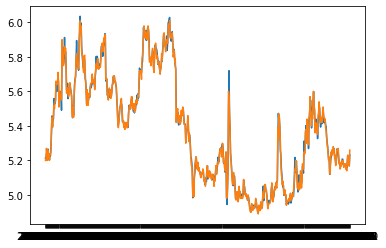

In [95]:
plt.plot(test_draw_time, y_predict,test_draw_time,y_test)

In [140]:
predictPrice = pd.DataFrame(y_predict)

In [141]:
predictPrice.columns = ['PredictPrice']
predictPrice.head()

,PredictPrice
0,67.261900
1,65.020325
2,65.772861
3,65.840362
4,65.989586


In [142]:
RealPrice = pd.DataFrame(y_test)
RealPrice.columns = ['RealPrice']
RealPrice.head()

,RealPrice
0,67.34
1,65.00
2,65.48
3,66.35
4,65.35


In [143]:
result = RealPrice.join(predictPrice)

In [144]:
Date = pd.DataFrame(test_draw_time)
Date.columns = ['Date']
Date.head()

,Date
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08


In [145]:
Result = Date.join(result)
Result.head()

,Date,RealPrice,PredictPrice
0,2019-01-02,67.34,67.261900
1,2019-01-03,65.00,65.020325
2,2019-01-04,65.48,65.772861
3,2019-01-07,66.35,65.840362
4,2019-01-08,65.35,65.989586


In [146]:
tem = Date.join(test_data)
Result = tem.join(result)
Result.head()

,Date,open,high,low,volume,RealPrice,PredictPrice
0,2019-01-02,68.19,68.78,66.10,23261.0,67.34,67.261900
1,2019-01-03,67.23,67.23,63.85,32543.0,65.00,65.020325
2,2019-01-04,64.02,66.34,64.01,23091.0,65.48,65.772861
3,2019-01-07,66.25,66.79,65.07,18820.0,66.35,65.840362
4,2019-01-08,66.00,66.80,65.11,15534.0,65.35,65.989586


In [147]:
dirct = '/Users/zhaozeyuan/Downloads/DataSet/'+ code[0] +'Data.csv'
print(dirct)

/Users/zhaozeyuan/Downloads/DataSet/603288Data.csv


In [148]:
Result.to_csv(dirct)